# Saturday night Modeling using Markov Chains

https://towardsdatascience.com/saturday-night-modeling-using-markov-chains-with-python-a29188330a1e

Piero Paialunga  in Towards Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [3]:
# General procedure for generating Markov Chain transition
# Inputs are:  - current stats
#              - list of states
#              - probability matrix: each row corresponds 
#                to the set of transition probabilities from given state
#
def state_change(start_state,nodes,trans_matrix):
    index_list = np.arange(0,len(nodes),1).astype(int)
    index_state = nodes.index(start_state)
    row = trans_matrix[index_state]
    end_index = np.random.choice(index_list,p=row)
    end_state = nodes[end_index]
    return end_state

In [4]:
#
#  Generate single Markov Chain for our problem, with n steps
#
def two_bars_mc(n, history=True):
    nodes = ['Home','Bar1','Bar2','Back Home']
    index_list = np.arange(0,len(nodes),1).astype(int)
    trans_matrix = np.array([[0,0.7,0.3,0],[0,0.7,0.2,0.1],[0,0,0.7,0.3],[0,0,0,1]])
    state = ['Home']
    start_state = 'Home'
    for i in range(n):
        start_state = state_change(start_state,nodes,trans_matrix)
        if history==True:
            state.append(start_state)
    if history==True:
        result = state
    else:
        result = start_state
    return result

In [5]:
#
#  Run multiple Markov Chains, return collection of result
#
def collection(process, M, n=100, history=False):
    final_state = []
    for m in range(M):
        final_state.append(process(n=n,history=history))
    return final_state

In [6]:
Nmc = 100

two_bar_history = collection(two_bars_mc,M=Nmc,history=True)

Visits in Bar 1 only:  22 , in Bar 2 only:  29 , in both:  49


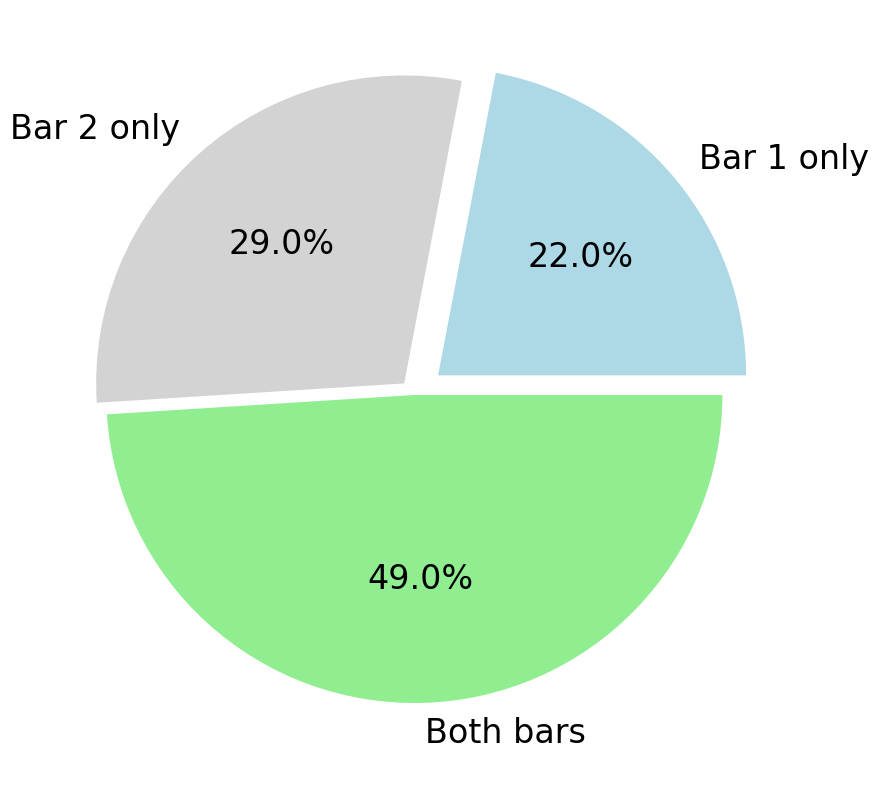

In [7]:
one = 0
two = 0
both = 0
for hist in two_bar_history:
    hist = list(set(hist))     # set removes duplicates
    if 'Bar1' in hist:
        if 'Bar2' in hist:
            both = both+1
        else:
            one = one+1
    else:
        two = two+1
    
print("Visits in Bar 1 only: ",one,", in Bar 2 only: ",two,", in both: ",both)

plt.pie([one,two,both],labels=['Bar 1 only','Bar 2 only','Both bars'],colors=['lightblue','lightgrey','lightgreen'],
       autopct='%1.1f%%', textprops={'fontsize': 24,'color':'k'},explode=[0.1,0.05,0.0])

fname = '14_TwoBar'

plt.savefig(fname)
